In [143]:
from sympy import *
from sympy.physics.vector import *
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
init_printing()

In [144]:
def frange(end,start=0,inc=0,precision=1):
    """A range function that accepts float increments."""
    import math

    if not start:
        start = end + 0.0
        end = 0.0
    else: end += 0.0

    if not inc:
        inc = 1.0
    count = int(math.ceil((start - end) / inc))

    L = [None] * count

    L[0] = end
    for i in (range(1,count)):
        L[i] = L[i-1] + inc
    return L

In [180]:
R = ReferenceFrame('R')
x,y,z = symbols('x y z',real=True)
A=1
B=1
C=1

In [181]:
Xvec=[x,y,z]
vvec=[(A*sin(z)+C*cos(y)),(B*sin(x)+A*cos(z)),(C*sin(y)+B*cos(x))]

In [182]:
def gradvf(i,j):
    return diff(vvec[i],Xvec[j])

In [183]:
GradVel=Matrix(3,3,gradvf)

In [184]:
GradVelnum=lambdify((x,y,z),GradVel,modules='numpy')

In [185]:
SMALL=1e-20
m=101
xnum=np.zeros(m)
ynum=np.zeros(m)
znum=np.zeros((m,m))
c=np.zeros((3*(m*m),3,3))
n=0
for l in frange(0,2*np.pi+2*np.pi/(m-1),2*np.pi/(m-1)):
    xnum[n]=l
    ynum[n]=l
    n+=1
n=0
xnum,ynum=np.meshgrid(xnum,ynum)
for i in range(0,m-1):
    for j in range(0,m-1):
        c[n,:,:]=GradVelnum(xnum[i,j],ynum[i,j],2*np.pi)
        n+=1
for i in range(0,m-1):
    for j in range(0,m-1):
        c[n,:,:]=GradVelnum(2*np.pi,xnum[i,j],ynum[i,j])
        n+=1
for i in range(0,m-1):
    for j in range(0,m-1):
        c[n,:,:]=GradVelnum(xnum[i,j],2*np.pi,ynum[i,j])
        n+=1

In [186]:
D=c+np.transpose(c,(0,2,1))
W=c-np.transpose(c,(0,2,1))
w,v=np.linalg.eigh(D)
DDT=np.einsum('aij,akj->aik', D, D)
Dnorm=np.sqrt(np.trace(DDT,axis1=1,axis2=2))
WWT=np.einsum('aij,akj->aik', W, W)
Wnorm=np.sqrt(np.trace(WWT,axis1=1,axis2=2))
DD=np.einsum('aij,ajk->aik', D, D)
WW=np.einsum('aij,ajk->aik', W, W)

In [187]:
# Q criterium
Q=((1/(np.pi))*np.arccos((np.power(Wnorm,2)-(np.power(Dnorm,2)))/(np.power(Wnorm,2)+(np.power(Dnorm,2))+SMALL)))

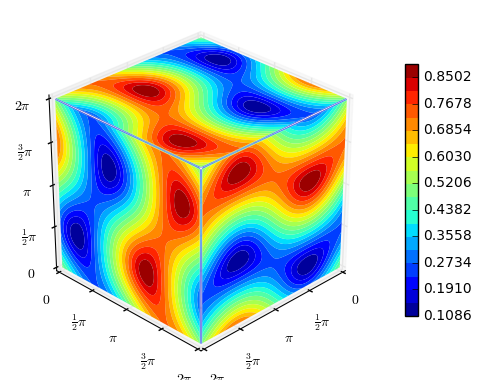

In [188]:
plt.close('all')
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.pbaspect = [1.0, 1.0, 1.0]

cset = [[],[],[]]
n=0
for i in range(0,m-1):
    for j in range(0,m-1):
        znum[i,j]=Q[n]
        n+=1
cset[0] = ax.contourf(xnum, ynum, znum, zdir='z', offset=2*np.pi,
                      levels=np.linspace(np.min(Q),np.max(Q),20),cmap='jet',linewidth=0,antialiased=True)

for i in range(0,m-1):
    for j in range(0,m-1):
        znum[i,j]=Q[n]
        n+=1 
cset[1] = ax.contourf(znum, xnum, ynum, zdir='x', offset=2*np.pi,
                      levels=np.linspace(np.min(Q),np.max(Q),20),cmap='jet',linewidth=0,antialiased=True)

for i in range(0,m-1):
    for j in range(0,m-1):
        znum[i,j]=Q[n]
        n+=1 
cset[2] = ax.contourf(xnum, znum, ynum, zdir='y', offset=2*np.pi,
                      levels=np.linspace(np.min(Q),np.max(Q),20),cmap='jet',linewidth=0,antialiased=True)

# setting 3D-axis-limits:    
ax.set_xlim3d(0,2*np.pi)
ax.set_ylim3d(0,2*np.pi)
ax.set_zlim3d(0,2*np.pi)
ax.set_xticks([0., .5*np.pi, np.pi, 1.5*np.pi, 2*np.pi])
ax.set_xticklabels(["$0$", r"$\frac{1}{2}\pi$",
                     r"$\pi$", r"$\frac{3}{2}\pi$", r"$2\pi$"])
ax.set_yticks([0., .5*np.pi, np.pi, 1.5*np.pi, 2*np.pi])
ax.set_yticklabels(["$0$", r"$\frac{1}{2}\pi$",
                     r"$\pi$", r"$\frac{3}{2}\pi$", r"$2\pi$"])
ax.set_zticks([0., .5*np.pi, np.pi, 1.5*np.pi, 2*np.pi])
ax.set_zticklabels(["$0$", r"$\frac{1}{2}\pi$",
                     r"$\pi$", r"$\frac{3}{2}\pi$", r"$2\pi$"])

#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.01f'))

#ax.xaxis.set_major_locator(LinearLocator(10))
#ax.xaxis.set_major_formatter(FormatStrFormatter('%.01f'))

#ax.yaxis.set_major_locator(LinearLocator(10))
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.01f'))


ax.view_init(30, 45)

fig.subplots_adjust(bottom=-0.2,top=0.7)

cb = fig.colorbar(cset[0], shrink=0.7)

plt.show()